# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 1

Mounted at /gdrive
/gdrive/My Drive/[2024-2025] AN2DL/Homework 1


## ⚙️ Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)
tf.random.set_seed(42);

## ⏳ Load the Data

In [ ]:
data = np.load('training_set.npz')
x = data['images']
y = data['labels']
x = x[0:11959, : , :]
y = y[0:11959, : ]
print("x shape:", x.shape)
print("y shape:", y.shape)
x = x.astype('float32') / 255.0
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)
y_val = to_categorical(y_val, num_classes=8)

print("train_shape:", x_train.shape, y_train.shape)
print("test_shape:", x_test.shape, y_test.shape)

x shape: (11959, 96, 96, 3)
y shape: (11959, 1)
train_shape: (9567, 96, 96, 3) (9567, 8)
test_shape: (1913, 96, 96, 3) (1913, 8)


In [ ]:
# Count the occurrences of each class
unique_classes, class_counts = np.unique(y, return_counts=True)

# Display the results
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} images")

# If you want a dictionary for easy access
class_distribution = dict(zip(unique_classes, class_counts))
print("Class distribution:", class_distribution)

Class 0: 852 images
Class 1: 2181 images
Class 2: 1085 images
Class 3: 2026 images
Class 4: 849 images
Class 5: 993 images
Class 6: 2330 images
Class 7: 1643 images
Class distribution: {0: 852, 1: 2181, 2: 1085, 3: 2026, 4: 849, 5: 993, 6: 2330, 7: 1643}


## 🛠️ Train and Save the Model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 3, 3, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,080,648 (65.16 MB)

 Trainable params: 17,079,624 (65.15 MB)

 Non-trainable params: 1,024 (4.00 KB)

Class weights: {0: 1.7716666666666667, 1: 0.6798607163160887, 2: 1.380918013856813, 3: 0.7234573502722323, 4: 1.776931649331352, 5: 1.5156844106463878, 6: 0.6464189189189189, 7: 0.9184907834101382}
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 75/148 ━━━━━━━━━━━━━━━━━━━━ 55s 759ms/step - accuracy: 0.5658 - loss: 1.3101

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


148/148 ━━━━━━━━━━━━━━━━━━━━ 100s 433ms/step - accuracy: 0.6573 - loss: 1.0239 - val_accuracy: 0.8309 - val_loss: 0.5050
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 82s 217ms/step - accuracy: 0.9402 - loss: 0.1765 - val_accuracy: 0.9415 - val_loss: 0.1807
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 34s 218ms/step - accuracy: 0.9611 - loss: 0.1183 - val_accuracy: 0.9144 - val_loss: 0.3222
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 37s 229ms/step - accuracy: 0.9667 - loss: 0.0916 - val_accuracy: 0.9478 - val_loss: 0.2039
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 34s 217ms/step - accuracy: 0.9706 - loss: 0.0891 - val_accuracy: 0.9749 - val_loss: 0.0779
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 35s 219ms/step - accuracy: 0.9780 - loss: 0.0616 - val_accuracy: 0.9624 - val_loss: 0.1388
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 40s 217ms/step - accuracy: 0.9761 - loss: 0.0603 - val_accuracy: 0.9770 - val_loss: 0.0981
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.9824 - loss: 0.0499 - va

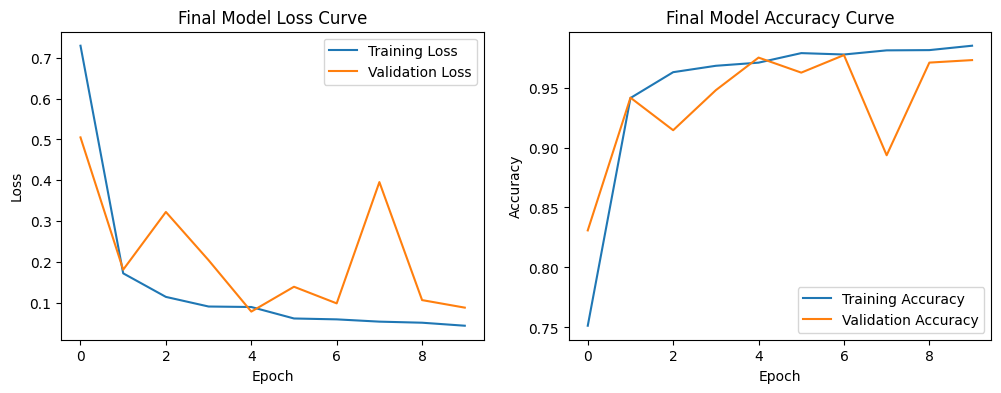

60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step
Confusion Matrix:
 [[134   0   0   1   0   0   2   0]
 [  0 341   0   0   0   0   1   0]
 [  1   0 171   0   0   0   0   0]
 [  2   0   1 279   0   0   9   0]
 [  0   0   2   1 136   1   0   0]
 [  0   0   0  22   0 131   0   0]
 [  0   0   1   5   0   0 393   0]
 [  0   0   0   0   0   0   0 279]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       137
           1       1.00      1.00      1.00       342
           2       0.98      0.99      0.99       172
           3       0.91      0.96      0.93       291
           4       1.00      0.97      0.99       140
           5       0.99      0.86      0.92       153
           6       0.97      0.98      0.98       399
           7       1.00      1.00      1.00       279

    accuracy                           0.97      1913
   macro avg       0.98      0.97      0.97      1913
weighted avg       0.98      0.97      0

In [ ]:
from tensorflow.keras.applications import VGG16

# Import VGG16 without the top layer (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

#Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='nearest',
    height_shift_range=0.1,
    width_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)
datagen.fit(x_train)

model = Sequential()

# Add the base model (VGG16 without the top layers)
model.add(base_model)

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.summary()
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights for training data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train.argmax(axis=1)), y=y_train.argmax(axis=1))
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class weights:", class_weights_dict)

from tensorflow.keras import mixed_precision
# Enable mixed precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
# Wrap the optimizer with loss scaling
base_optimizer = Adam(learning_rate=0.0001)
optimizer = mixed_precision.LossScaleOptimizer(base_optimizer)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Compile the model with the custom weighted loss
# model.compile(optimizer=optimizer,
#               loss=weighted_categorical_crossentropy(class_weights_dict),
#               metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with validation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    # balanced_data_generator(x_train, y_train, batch_size=128),
    validation_data=(x_val, y_val),
    epochs=50,
    class_weight=class_weights_dict,  # Include class weights
    steps_per_epoch = len(x_train) // 128 * 2,
    # steps_per_epoch=len(x_train) // 64,
    # validation_data=(x_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Plot final model training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Final Model Loss Curve")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Final Model Accuracy Curve")

plt.show()

from sklearn.metrics import confusion_matrix, classification_report

# Predict class labels for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate and print the confusion matrix and classification report
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_mat)

class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", class_report)

# Save Model Weights
model.save('weights.keras')

# Clean Up
del model

## 📊 Prepare Your Submission

To prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:

```python
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""
```

The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.

❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('weights.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        X = X.astype('float32') / 255.0
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Overwriting model.py


In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py weights.keras


  adding: model.py (deflated 54%)
  adding: weights.keras (deflated 9%)
